<a href="https://colab.research.google.com/github/T-Sunm/Image-retrieval-with-deeplearning/blob/main/Image_retrieval_with_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
!unzip data

Downloading...
From (original): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF
From (redirected): https://drive.google.com/uc?id=1msLVo0g0LFmL9-qZ73vq9YEVZwbzOePF&confirm=t&uuid=4d612e0d-e3c4-461e-b70d-c94d09046e57
To: /content/data.zip
100% 76.1M/76.1M [00:00<00:00, 88.8MB/s]
Archive:  data.zip
   creating: data/
   creating: data/.ipynb_checkpoints/
   creating: data/test/
   creating: data/test/American_egret/
  inflating: data/test/American_egret/n02009912_2473.JPEG  
   creating: data/test/Doberman/
  inflating: data/test/Doberman/n02107142_52285.JPEG  
   creating: data/test/Rhodesian_ridgeback/
  inflating: data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: data/test/African_crocodile/
  inflating: data/test/African_crocodile/n01697457_18534.JPEG  
   creating: data/test/Lakeland_terrier/
  inflating: data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: data/test/ambulance/
  inflating: data/test/ambulance/n02701002_2311.JPEG  
   creati

In [2]:
! pip install chromadb
! pip install open-clip-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 95.7 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

In [4]:
embedding_function = OpenCLIPEmbeddingFunction()

def get_single_image_embedding(image):
 embedding = embedding_function._encode_image(image=image)
 return np.array(embedding)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [5]:
# đọc file và chuyển thành numpy
def read_image_from_path(path, size):
  img = Image.open(path).convert('RGB').resize(size)
  return np.array(img)

# từ ảnh từ folder và chuyển về np
def folder_to_images(folder,size):
  list_dir = [folder + "/" + name for name in os.listdir(folder)]

  # shape = len(list_dir), 448, 448, 3
  images_np = np.zeros(shape=(len(list_dir), *size, 3))
  images_path = []
  for i, dir in enumerate(list_dir):
    images_np[i] = read_image_from_path(dir,size)
    images_path.append(dir)

  images_path = np.array(images_path)
  return images_np, images_path

def plot_results(query_path, ls_path_score: list, reverse=False):
  ls_path_score.sort(key=lambda x: x[1], reverse=reverse)
  ls_path_score = ls_path_score[:5]
  print(ls_path_score)
  plt.figure(figsize=(10, 10))

  plt.subplot(2, 3, 1)
  plt.imshow(Image.open(query_path))
  plt.title(f"Query Image: {query_path.split('/')[2]}")
  for i, (image_path, score) in enumerate(ls_path_score):
    plt.subplot(2, 3, i+2)
    plt.title(f"Top {i + 1} : {query_path.split('/')[2]}")
    plt.imshow(Image.open(image_path))
  plt.show()

## Truy vấn embedding vector với độ đo L1

In [ ]:
def compute_L1_score(query_np, images_np):
  axis_batch_size = tuple(range(1, len(images_np.shape)))

  ans = np.sum(np.abs(query_np - images_np), axis=axis_batch_size)
  return ans

def get_L1_score(root_img_path, query_path, size):
  query_np = read_image_from_path(query_path, size)
  query_ft = get_single_image_embedding(query_np)
  ls_path_score = []
  for class_name in os.listdir(root_img_path):
    class_path = root_img_path + class_name
    images_np, images_path = folder_to_images(class_path, size)

    embedding_lst = []
    for idx in range(images_np.shape[0]):
      image_np_ft = get_single_image_embedding(images_np[idx].astype(np.uint8))
      embedding_lst.append(image_np_ft)

    scores = compute_L1_score(query_ft, np.array(embedding_lst))
    ls_path_score.extend(list(zip(images_path, scores)))

  return query_np, ls_path_score

[('data/train/Orange_easy/r_305_100.jpg', 4.079990337777417), ('data/train/Orange_easy/r_193_100.jpg', 5.438996097422205), ('data/train/Orange_easy/r_137_100.jpg', 5.692411737550174), ('data/train/Orange_easy/r_170_100.jpg', 5.972357056245528), ('data/train/Orange_easy/dark.png', 9.455337131287706)]


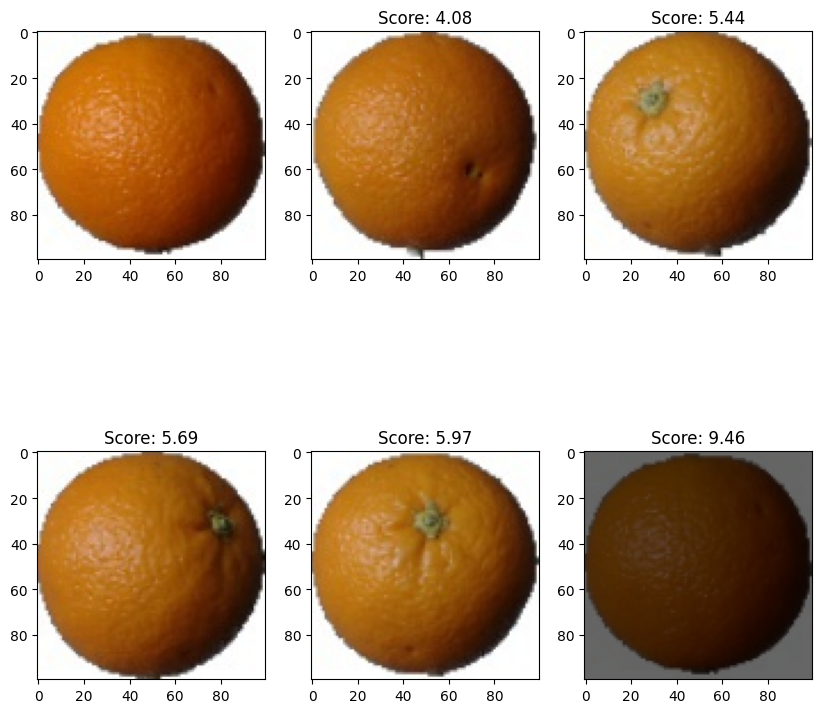

In [ ]:
ROOT = "data"

root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_L1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

[('data/train/African_crocodile/n01697457_10393.JPEG', 9.512797435381799), ('data/train/African_crocodile/n01697457_5586.JPEG', 10.202177606362966), ('data/train/African_crocodile/n01697457_14906.JPEG', 11.992313866211248), ('data/train/African_crocodile/n01697457_1331.JPEG', 12.823922960917116), ('data/train/African_crocodile/n01697457_260.JPEG', 12.857396769337356)]


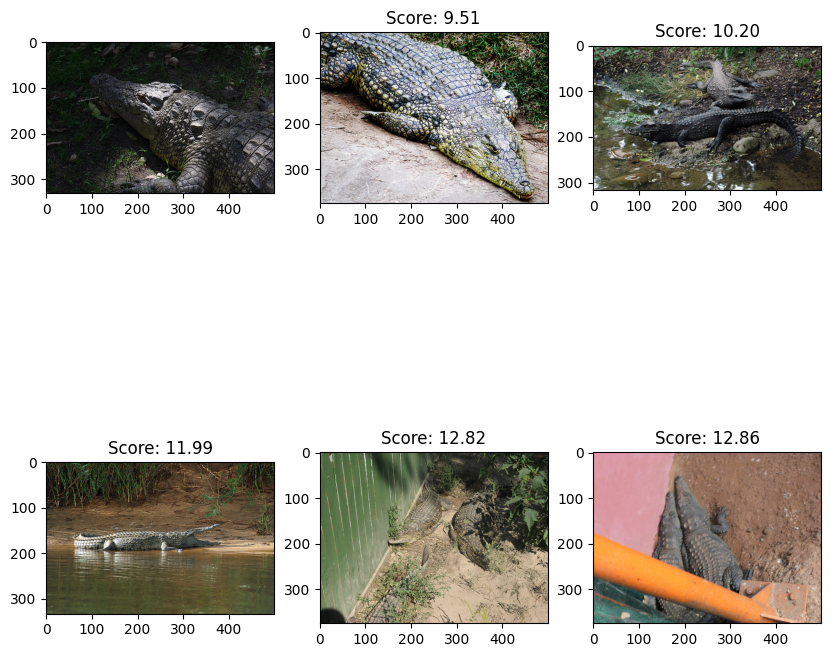

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_L1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

## Truy vấn embedding vector với độ đo L2

In [ ]:
def compute_L2_score(query_np, images_np):
  axis_batch_size = tuple(range(1, len(images_np.shape)))

  ans = np.sqrt(np.sum(np.square(query_np - images_np), axis=axis_batch_size))
  return ans

def get_L2_score(root_img_path, query_path, size):
  query_np = read_image_from_path(query_path, size)
  query_ft = get_single_image_embedding(query_np)
  ls_path_score = []
  for class_name in os.listdir(root_img_path):
    class_path = root_img_path + class_name
    images_np, images_path = folder_to_images(class_path, size)

    embedding_lst = []
    for idx in range(images_np.shape[0]):
      image_np_ft = get_single_image_embedding(images_np[idx].astype(np.uint8))
      embedding_lst.append(image_np_ft)

    scores = compute_L2_score(query_ft, np.array(embedding_lst))
    ls_path_score.extend(list(zip(images_path, scores)))

  return query_np, ls_path_score

[('data/train/Orange_easy/r_305_100.jpg', 0.2287092494045945), ('data/train/Orange_easy/r_193_100.jpg', 0.304675517928543), ('data/train/Orange_easy/r_137_100.jpg', 0.32329241909284284), ('data/train/Orange_easy/r_170_100.jpg', 0.33020026895822835), ('data/train/Orange_easy/dark.png', 0.5344317484121497)]


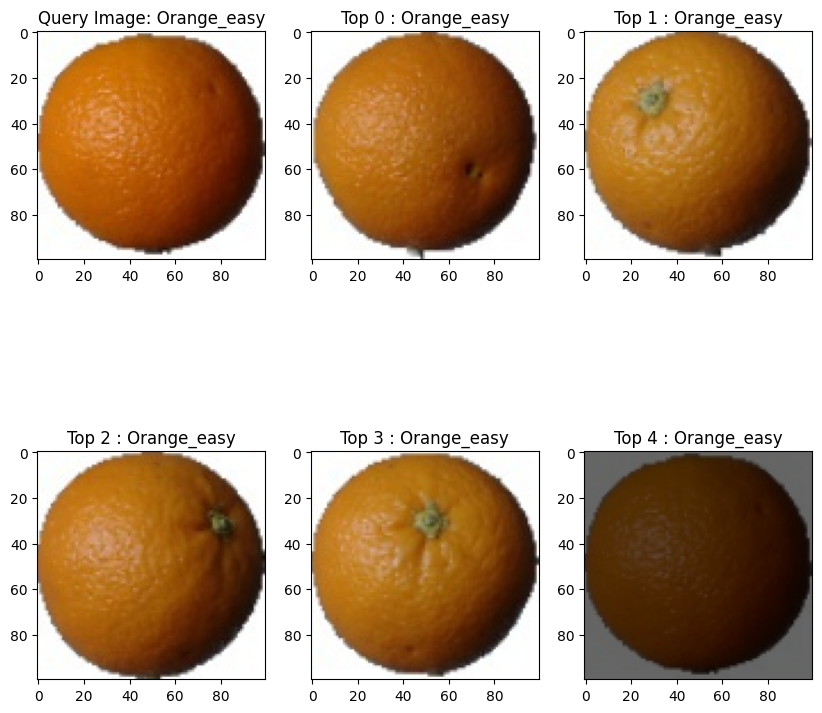

In [ ]:
ROOT = "data"

root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

[('data/train/African_crocodile/n01697457_10393.JPEG', 0.5342272728582953), ('data/train/African_crocodile/n01697457_5586.JPEG', 0.5743115163639173), ('data/train/African_crocodile/n01697457_14906.JPEG', 0.6689446122365186), ('data/train/African_crocodile/n01697457_1331.JPEG', 0.7174476766288647), ('data/train/African_crocodile/n01697457_260.JPEG', 0.739693795317971)]


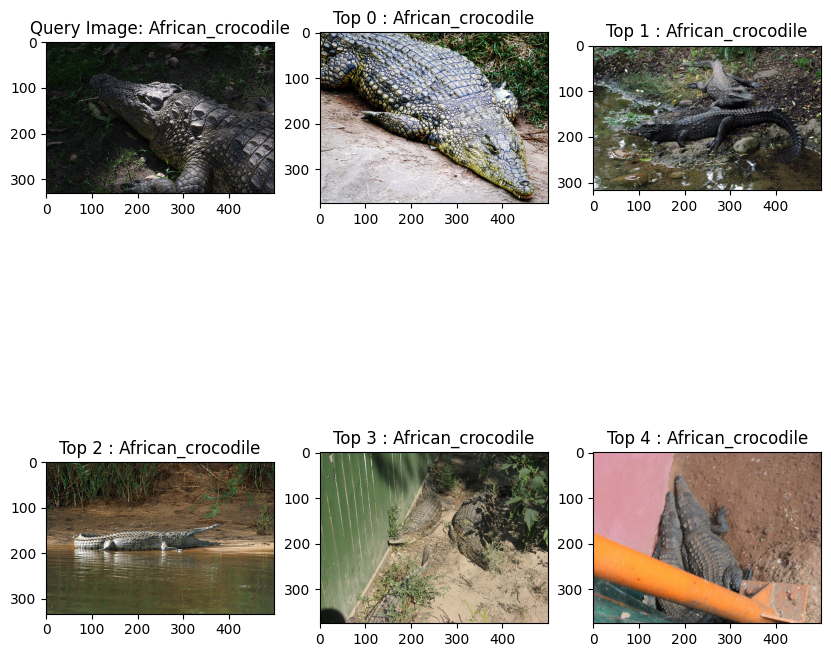

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

## Truy vấn embedding vector với độ đo Cosine Similarity

In [ ]:
def compute_cosine_similarity_score(query_np, images_np):
  axis_batch_size = tuple(range(1, len(images_np.shape)))

  numerator = np.sum(query_np * images_np, axis=axis_batch_size)
  denominator = np.linalg.norm(query_np, axis=axis_batch_size) * np.linalg.norm(images_np, axis=axis_batch_size)
  ans = numerator / denominator
  return ans

def get_cosine_similarity_score(root_img_path, query_path, size):
  query_np = read_image_from_path(query_path, size)
  query_ft = get_single_image_embedding(query_np)
  ls_path_score = []
  for class_name in os.listdir(root_img_path):
    class_path = root_img_path + class_name
    images_np, images_path = folder_to_images(class_path, size)

    embedding_lst = []
    for idx in range(images_np.shape[0]):
      image_np_ft = get_single_image_embedding(images_np[idx].astype(np.uint8))
      embedding_lst.append(image_np_ft)

    scores = compute_cosine_similarity_score(query_ft, np.array(embedding_lst))
    ls_path_score.extend(list(zip(images_path, scores)))

  return query_np, ls_path_score

[('data/train/Orange_easy/r_305_100.jpg', 0.2287092494045945), ('data/train/Orange_easy/r_193_100.jpg', 0.304675517928543), ('data/train/Orange_easy/r_137_100.jpg', 0.32329241909284284), ('data/train/Orange_easy/r_170_100.jpg', 0.33020026895822835), ('data/train/Orange_easy/dark.png', 0.5344317484121497)]


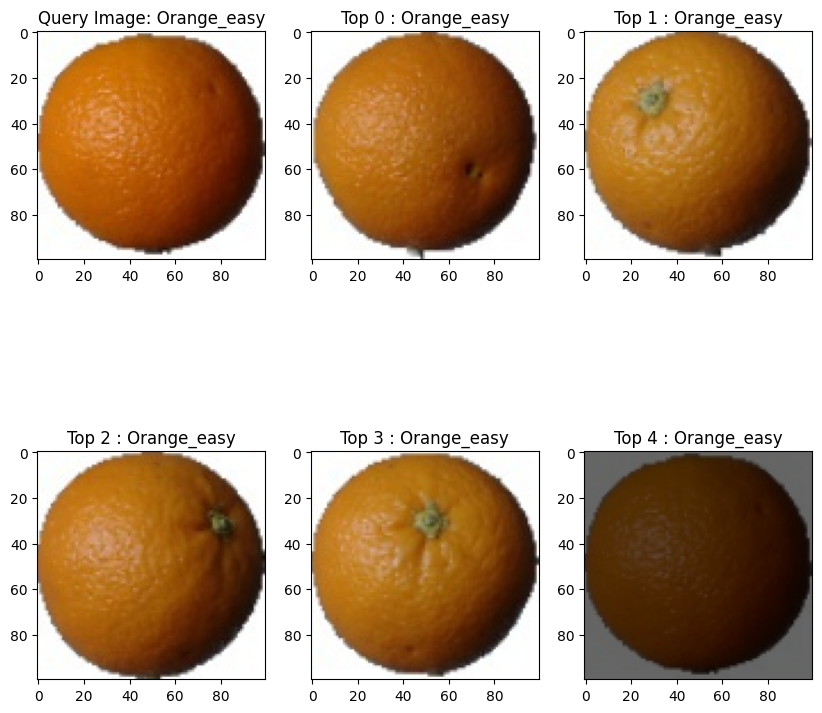

In [ ]:
ROOT = "data"

root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

[('data/train/African_crocodile/n01697457_10393.JPEG', 0.5342272728582953), ('data/train/African_crocodile/n01697457_5586.JPEG', 0.5743115163639173), ('data/train/African_crocodile/n01697457_14906.JPEG', 0.6689446122365186), ('data/train/African_crocodile/n01697457_1331.JPEG', 0.7174476766288647), ('data/train/African_crocodile/n01697457_260.JPEG', 0.739693795317971)]


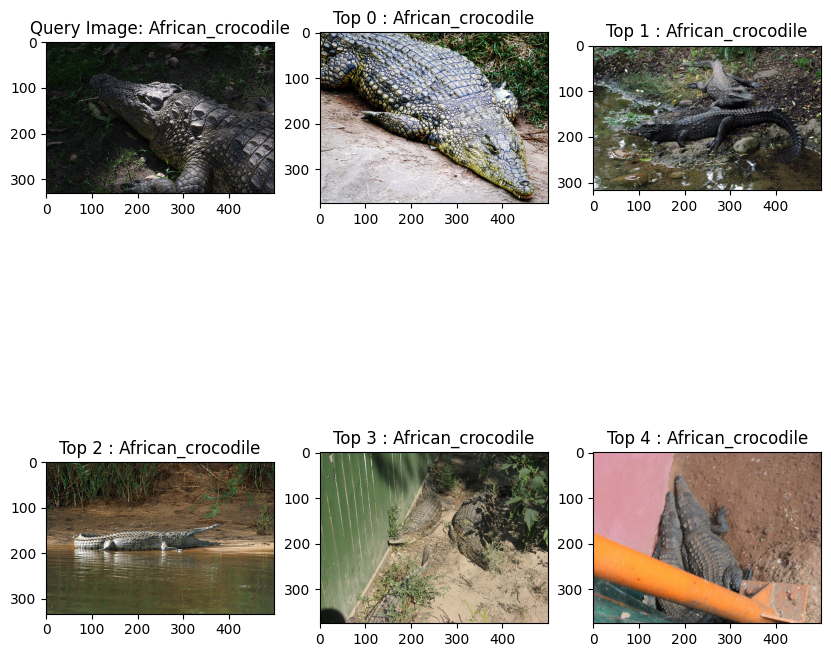

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

## Truy vấn hình ảnh với độ đo Correlation Coefficient

In [ ]:
def compute_correlation_coefficient_score(query_np, images_np):
  axis_batch_size = tuple(range(1, len(images_np.shape)))

  mean_query = np.mean(query_np)
  mean_images = np.mean(images_np, axis=axis_batch_size)

  numerator = np.sum((query_np - mean_query) * (images_np - mean_images), axis=axis_batch_size)
  denominator = np.linalg.norm(query_np - mean_query, axis=axis_batch_size) * np.linalg.norm(images_np - mean_images, axis=axis_batch_size)
  ans = numerator / denominator
  return ans

def get_correlation_coefficient_score(root_img_path, query_path, size):
  query_np = read_image_from_path(query_path, size)
  query_ft = get_single_image_embedding(query_np)
  ls_path_score = []
  for class_name in os.listdir(root_img_path):
    class_path = root_img_path + class_name
    images_np, images_path = folder_to_images(class_path, size)

    embedding_lst = []
    for idx in range(images_np.shape[0]):
      image_np_ft = get_single_image_embedding(images_np[idx].astype(np.uint8))
      embedding_lst.append(image_np_ft)

    scores = compute_correlation_coefficient_score(query_ft, np.array(embedding_lst))
    ls_path_score.extend(list(zip(images_path, scores)))

  return query_np, ls_path_score

[('data/train/Orange_easy/r_305_100.jpg', 0.2287092494045945), ('data/train/Orange_easy/r_193_100.jpg', 0.304675517928543), ('data/train/Orange_easy/r_137_100.jpg', 0.32329241909284284), ('data/train/Orange_easy/r_170_100.jpg', 0.33020026895822835), ('data/train/Orange_easy/dark.png', 0.5344317484121497)]


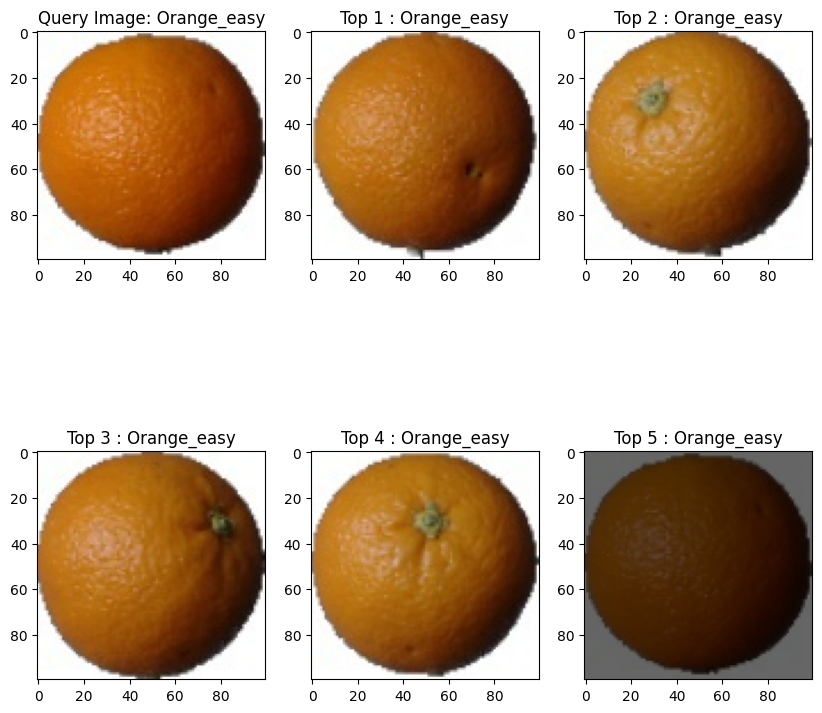

In [ ]:
ROOT = "data"

root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

[('data/train/African_crocodile/n01697457_10393.JPEG', 0.5342272728582953), ('data/train/African_crocodile/n01697457_5586.JPEG', 0.5743115163639173), ('data/train/African_crocodile/n01697457_14906.JPEG', 0.6689446122365186), ('data/train/African_crocodile/n01697457_1331.JPEG', 0.7174476766288647), ('data/train/African_crocodile/n01697457_260.JPEG', 0.739693795317971)]


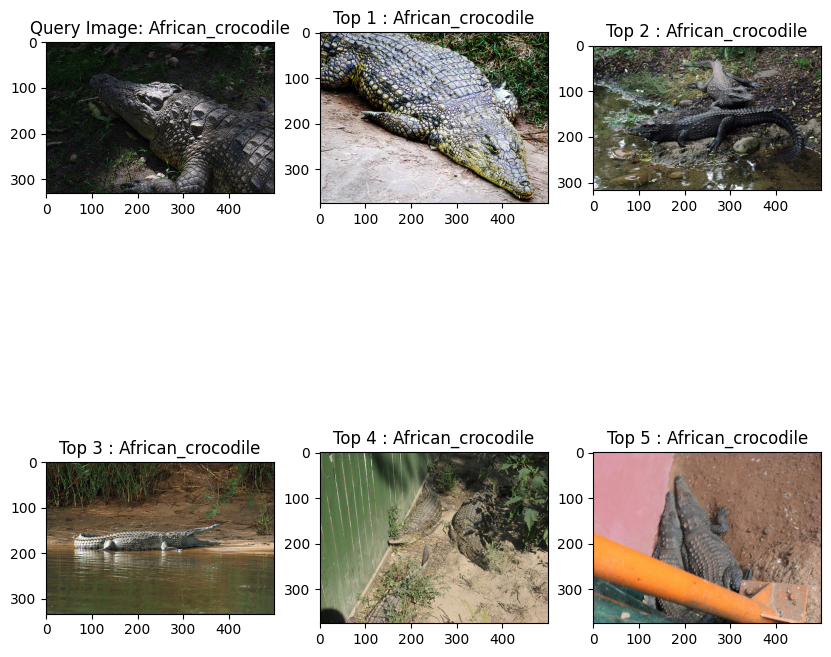

In [ ]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_L2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

## Tối ưu hoá quá trình truy vấn hình ảnh sử dụng mô hình CLIP và cơ sở dữ liệu vector

In [6]:
import chromadb
from tqdm import tqdm

In [9]:
def get_files_path(path):
  files_path = []
  for class_name in os.listdir(path):
    for file_name in os.listdir(path + "/" + class_name):
      files_path.append(path + "/" + class_name + "/" + file_name)
  return files_path

def add_embedding(collection, files_path):
  ids = []
  embeddings = []
  for id_file, file_path in tqdm(enumerate(files_path)):
    image = np.array(Image.open(file_path))
    embedding = get_single_image_embedding(image)
    ids.append(f"id_{id_file}")
    embeddings.append(embedding.tolist())

  collection.add(
    embeddings=embeddings,
    ids=ids
  )

def get_files_path_by_id(ids, files_path):
  files_path_filter = []
  for id in ids:
    files_path_filter.append(files_path[int(id.split("_")[1])])

  return files_path_filter


In [10]:
# Create a Chroma Client
chroma_client = chromadb.Client()

# Define the HNSW_SPACE key
HNSW_SPACE = "HNSW_SPACE"

# Create a collection
l2_collection = chroma_client.get_or_create_collection(name="l2_collection",
metadata={HNSW_SPACE: "l2"})

In [11]:
ROOT = "data"
data_path = f'{ROOT}/train'
files_path = get_files_path(path=data_path)
add_embedding(l2_collection, files_path)



595it [02:11,  4.52it/s]


In [12]:
def search(image_path, collection, n_results):
  image = np.array(Image.open(image_path))
  embedding = get_single_image_embedding(image)

  result = collection.query(
      query_embeddings=[embedding.tolist()],
      n_results=n_results
  )
  return result

[('data/train/Lakeland_terrier/n02095570_5689.JPEG', 0.35689792037010193), ('data/train/Lakeland_terrier/n02095570_5456.JPEG', 0.4462684988975525), ('data/train/Lakeland_terrier/n02095570_866.JPEG', 0.5465602874755859), ('data/train/Lakeland_terrier/n02095570_1055.JPEG', 0.5535179376602173), ('data/train/Lakeland_terrier/n02095570_2569.JPEG', 0.6880053281784058)]


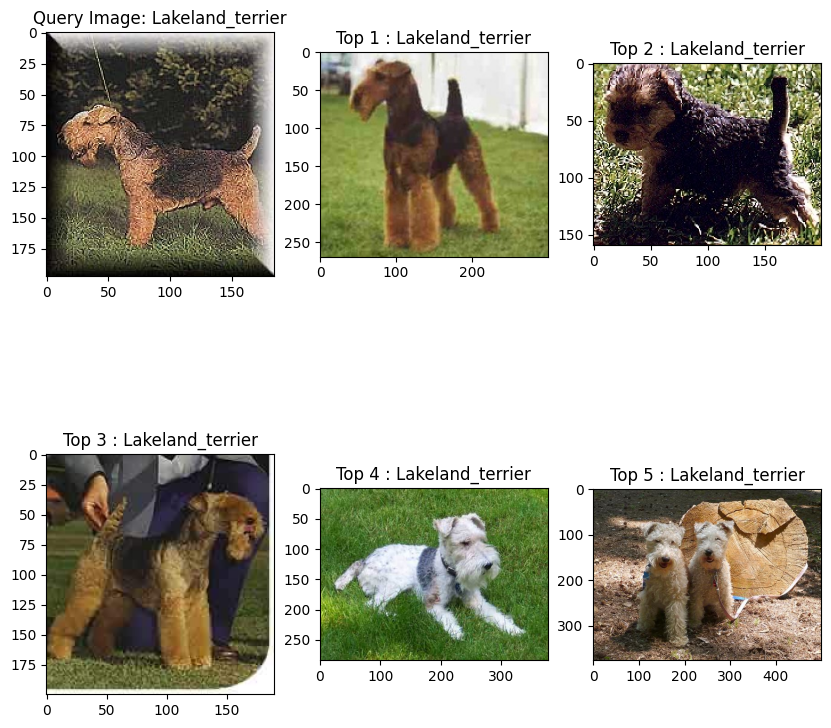

In [15]:
test = f"{ROOT}/test"
test_files_paths = get_files_path(test)
query = test_files_paths[1]
result = search(query, l2_collection, 5)

result_path_score = list(zip(get_files_path_by_id(result["ids"][0], files_path), result["distances"][0]))
plot_results(query, result_path_score, reverse = False)
